In [2]:
import pandas as pd
import numpy as np
import catboost
from catboost import CatBoostRegressor
from datetime import datetime
from config import *
import pandas as pd, numpy as np, json, os

import yfinance as yf

In [2]:
son=pd.read_excel("./excel/FiyatPenceresi.Xlsx")
endeks=son.iloc[-1,:]
son=son.iloc[:-1,:]
hisseler=son["Kod"].values
hisseler=np.array(hisseler)


In [3]:
directory = 'C:/DATA'

# Boş bir DataFrame oluştur
combined_df = pd.DataFrame()

# Dizindeki tüm JSON dosyalarını oku ve DataFrame'e ekle
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        try:
            df = pd.read_json(file_path)
            combined_df = pd.concat([combined_df, df], ignore_index=True)
        except ValueError as e:
            print(f"Error reading {file_path}: {e}")

In [4]:
combined_df["PriceChannel"]=combined_df["PriceChannel"].str[12:].str.upper()
combined_df["Volume"]=combined_df["Amount"]*combined_df["Close"]
combined_df=combined_df.set_index(pd.to_datetime(combined_df["Date"]))
del combined_df["Date"]
del combined_df["Amount"]
combined_df=combined_df[["High","Low","Open","Close","Volume","PriceChannel"]]
combined_df.columns=['High', 'Low', 'Open', 'Adj Close', 'Volume', 'Hisse']
combined_df=combined_df[combined_df["Hisse"].isin(hisseler)]
combined_df = combined_df[~combined_df['Hisse'].isin(['IDEAS', 'ISATR', 'ISKUR', 'ITTFH'])]


In [5]:
combined_df=combined_df.groupby('Hisse').apply(lambda x: x.sort_index(ascending=True))

C:\Users\Bora\AppData\Local\Temp\ipykernel_10452\2606562311.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df=combined_df.groupby('Hisse').apply(lambda x: x.sort_index(ascending=True))


In [6]:
combined_df=combined_df.droplevel(level=0)

In [7]:
combined_df=combined_df.groupby('Hisse').apply(lambda x: x.sort_index(ascending=True)).droplevel(level=0)

C:\Users\Bora\AppData\Local\Temp\ipykernel_10452\272909214.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df=combined_df.groupby('Hisse').apply(lambda x: x.sort_index(ascending=True)).droplevel(level=0)


In [16]:
combined_df[combined_df["Hisse"]=="ARZUM"].tail(3)

,High,Low,Open,Adj Close,Volume,Hisse
Date,,,,,,
2024-06-21,69.50,63.00,68.70,63.00,7.406223e+07,ARZUM
2024-06-24,65.10,61.15,63.10,61.95,5.042296e+07,ARZUM
2024-06-25,66.95,61.75,61.95,66.75,1.023441e+08,ARZUM


In [82]:
canlı=pd.read_excel("./excel/FiyatPenceresi.Xlsx")
endekss=canlı.iloc[-1,:]
canlı=canlı.iloc[:-1,:]
canlı=canlı[["Yks","Dşk","Açl.Gün","Son.Fyt","Hcm","Kod","Lot","Frk"]]
canlı.columns=['High', 'Low', 'Open', 'Adj Close', 'Volume', 'Hisse',"Lot","Frk"]
canlı.index = pd.to_datetime([str(combined_df.index[-1])[:-9]] * len(canlı))
canlı = canlı[~canlı['Hisse'].isin(['IDEAS', 'ISATR', 'ISKUR', 'ITTFH'])]
canlı

,High,Low,Open,Adj Close,Volume,Hisse,Lot,Frk
2024-06-25,"28,16","27,20","27,98","27,26",28.539.207,A1CAP,1.030.275,"-0,68"
2024-06-25,"139,00","136,30","137,90","137,30",9.979.350,ACSEL,72.535,"-0,70"
2024-06-25,"517,00","490,00","515,00","507,50",94.848.638,ADEL,186.637,"-7,00"
2024-06-25,"2,22","2,19","2,19","2,19",101.433.283,ADESE,46.100.592,"0,00"
2024-06-25,"29,72","29,04","29,26","29,10",61.213.235,ADGYO,2.080.977,"-0,20"
...,...,...,...,...,...,...,...,...
2024-06-25,"6,50","6,20","6,42","6,46",69.150.637,YYAPI,10.937.088,"0,04"
2024-06-25,"12,13","11,89","12,07","11,92",52.673.415,YYLGD,4.394.954,"-0,15"
2024-06-25,"11,93","11,27","11,93","11,31",41.467.837,ZEDUR,3.634.061,"-0,55"
2024-06-25,"5,59","5,47","5,54","5,49",399.866.666,ZOREN,72.453.414,"-0,06"


In [83]:
canlı["Lot"]=canlı["Lot"].astype("string")

In [84]:
canlı=canlı.dropna()

In [85]:
for i in range(len(canlı)):
    if len(canlı.iloc[i, -1]) <= 7:
        if '.' in canlı.iloc[i, -1]:
            parts = canlı.iloc[i, -1].split('.')
            decimal_part = parts[1]
            if len(decimal_part) == 1:
                decimal_part += '00'
            elif len(decimal_part) == 2:
                decimal_part += '0'
            elif len(decimal_part) == 3:
                canlı.iloc[i, -1] = parts[0] + decimal_part[:2]
            canlı.iloc[i, -1] = parts[0] + decimal_part


In [86]:
canlı["High"]=canlı["High"].str.replace(",",".")
canlı["Low"]=canlı["Low"].str.replace(",",".")
canlı["Open"]=canlı["Open"].str.replace(",",".")
canlı["Adj Close"]=canlı["Adj Close"].str.replace(",",".")
canlı["Lot"]=canlı["Lot"].astype(str).str.replace(".", "")
canlı["Frk"]=canlı["Frk"].str.replace(",",".")
canlı[["High","Low","Open","Adj Close","Lot","Frk"]]=canlı[["High","Low","Open","Adj Close","Lot","Frk"]].astype(float)
canlı["Volume"]=canlı["Lot"]*canlı["Adj Close"]

C:\Users\Bora\AppData\Local\Temp\ipykernel_808\3623061315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canlı["High"]=canlı["High"].str.replace(",",".")
C:\Users\Bora\AppData\Local\Temp\ipykernel_808\3623061315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canlı["Low"]=canlı["Low"].str.replace(",",".")
C:\Users\Bora\AppData\Local\Temp\ipykernel_808\3623061315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [87]:
kod=canlı["Hisse"].unique()
combined_df=combined_df[combined_df["Hisse"].isin(kod)]

In [88]:
combined_df["Kademe"] = np.where(combined_df["Adj Close"] < 20, 0.01,
                np.where(combined_df["Adj Close"] < 50, 0.02,
                    np.where(combined_df["Adj Close"] < 100, 0.05,
                        np.where(combined_df["Adj Close"] < 250, 0.1,
                            np.where(combined_df["Adj Close"] < 500, 0.25,
                                np.where(combined_df["Adj Close"] < 1000, 0.5,
                                    np.where(combined_df["Adj Close"] < 2500, 1, 2.5)
                                )  # Buradaki parantez eksikti.
                            )
                        )
                    )
                )
            )

In [89]:
combined_df["High"].loc[str(combined_df.index[-1])[:-9]]=canlı["High"].values
combined_df["Low"].loc[str(combined_df.index[-1])[:-9]]=canlı["Low"].values
combined_df["Open"].loc[str(combined_df.index[-1])[:-9]]=canlı["Open"].values
combined_df["Adj Close"].loc[str(combined_df.index[-1])[:-9]]=canlı["Adj Close"].values
combined_df["Volume"].loc[str(combined_df.index[-1])[:-9]]=canlı["Volume"].values

C:\Users\Bora\AppData\Local\Temp\ipykernel_808\1318434265.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined_df["High"].loc[str(combined_df.index[-1])[:-9]]=canlı["High"].values
C:\Users\Bora\AppData\Local\Temp\ipykernel_808\131843

In [90]:
combined_df["Tavan"]=((((combined_df["Adj Close"].shift(1))*1.1)/combined_df["Kademe"]).fillna(0).astype(int))*combined_df["Kademe"]
combined_df["Tavan"]=np.round(combined_df["Tavan"],2)

In [91]:
combined_df["Tavan Kontrol"]=np.where((combined_df["Tavan"]==combined_df["Adj Close"]),1,0)

In [92]:
combined_df["Taban"]=((((combined_df["Adj Close"].shift(1))*0.9)//combined_df["Kademe"]).fillna(0).astype(int))*combined_df["Kademe"]
combined_df["Taban"]=np.round(combined_df["Taban"],2)
combined_df["Taban"]=combined_df["Taban"]+combined_df["Kademe"]
combined_df["Taban"]=np.round(combined_df["Taban"],2)

In [93]:
combined_df["Tavan Kontrol"]=np.where((combined_df["Tavan"]==combined_df["Adj Close"]),1,0)
combined_df["Taban Kontrol"]=np.where((combined_df["Taban"]==combined_df["Adj Close"]),1,0)

In [94]:
import pandas_ta as ta

combined_df["SMA 5"]=combined_df["Adj Close"].rolling(5).mean()
combined_df["SMA 10"]=combined_df["Adj Close"].rolling(5).mean()
combined_df["SMA 200"]=combined_df["Adj Close"].rolling(5).mean()

# RSI
combined_df["RSI"] = ta.rsi(combined_df["Adj Close"],14)

# Bağıl Hacim
combined_df["Bağıl Hacim"] = combined_df["Volume"] / combined_df["Volume"].rolling(10).mean()



# ADX, DMI, Aroon
adx_data = ta.adx(combined_df["High"], combined_df["Low"], combined_df["Adj Close"], 14)
combined_df["ADX"], combined_df["DMIP"], combined_df["DMIN"] = adx_data.iloc[:, 0], adx_data.iloc[:, 1], adx_data.iloc[:, 2]




def calculate_stoch_rsi(data, rsi_period=14, stochastic_period=14, k_period=3, d_period=3):
    rsi = ta.rsi(data["Adj Close"], rsi_period)
    stoch_rsi = (rsi - rsi.rolling(window=stochastic_period).min()) / (rsi.rolling(window=stochastic_period).max() - rsi.rolling(window=stochastic_period).min())
    stoch_rsi_k = stoch_rsi.rolling(window=k_period).mean() * 100
    stoch_rsi_d = stoch_rsi_k.rolling(window=d_period).mean()
    data['StochRSI_%K'] = stoch_rsi_k
    data['StochRSI_%D'] = stoch_rsi_d
    return data

combined_df = calculate_stoch_rsi(combined_df)


def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    data['EMA_12'] = ta.ema(data['Adj Close'], short_period)
    data['EMA_26'] = ta.ema(data['Adj Close'], long_period)
    data['MACD'] = data['EMA_12'] - data['EMA_26']
    data['Signal_Line'] = ta.ema(data['MACD'], signal_period)
    data['MACD_above_Signal'] = (data['MACD'] > data['Signal_Line']).astype(float)
    return data

combined_df = calculate_macd(combined_df)



# Diğer Göstergeler
combined_df["DD"] = ((combined_df["Adj Close"] / combined_df["High"]) - 1) * 100
combined_df["Range"] = ((combined_df["High"] - combined_df["Low"]) / combined_df["Adj Close"]) * 100

combined_df["MOM"] = ta.mom(combined_df["Adj Close"], 10)



combined_df["Driehaus Momentum"] = ((combined_df["Bağıl Hacim"] > 2) & (combined_df["RSI"] > 50) & (combined_df["MOM"] > 1) & (combined_df["Adj Close"] > combined_df["SMA 5"]) & (combined_df["Adj Close"] > combined_df["SMA 10"]) & (combined_df["Adj Close"] > combined_df["SMA 200"])).astype(int)
combined_df["MACD Yukarı Kesen"] = ((combined_df["Bağıl Hacim"] > 1.5) & (combined_df["MACD"] > 0) & (combined_df["MACD_above_Signal"] == 1)).astype(int)
combined_df["ADXDMI20"] = ((combined_df["Bağıl Hacim"] > 1.3) & (combined_df["ADX"] > 20) & (combined_df["DMIP"] > combined_df["DMIN"])).astype(int)
combined_df["MACD+Stoch"] = ((combined_df["Bağıl Hacim"] > 1.3) & (combined_df["StochRSI_%K"] > combined_df["StochRSI_%D"]) & (combined_df["MACD_above_Signal"] == 1)).astype(int)




In [95]:
import pandas_ta as ta
import ta as ta1

combined_df['MACD_Signal'] = combined_df["Signal_Line"]
combined_df['MACD_Diff'] = ta1.trend.macd_diff(combined_df['Adj Close'])
combined_df['ROC'] = ta.roc(combined_df["Adj Close"],12)



In [96]:
combined_df["Return"]=100*((combined_df["Open"]/combined_df["Adj Close"].shift(2))-1)
combined_df["Return"]=combined_df["Return"].shift(-2)
combined_df["Date"]=pd.to_datetime(combined_df.index)
combined_df


,High,Low,Open,Adj Close,Volume,Hisse,Kademe,Tavan,Tavan Kontrol,Taban,...,MOM,Driehaus Momentum,MACD Yukarı Kesen,ADXDMI20,MACD+Stoch,MACD_Signal,MACD_Diff,ROC,Return,Date
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-15,27.50,27.50,27.50,27.50,7.200518e+06,A1CAP,0.02,0.00,0,0.02,...,NaN,0,0,0,0,NaN,NaN,NaN,20.945455,2023-06-15
2023-06-16,30.24,30.24,30.24,30.24,3.531563e+07,A1CAP,0.02,30.24,1,24.76,...,NaN,0,0,0,0,NaN,NaN,NaN,2.513228,2023-06-16
2023-06-19,33.26,33.26,33.26,33.26,6.191715e+07,A1CAP,0.02,33.26,1,27.22,...,NaN,0,0,0,0,NaN,NaN,NaN,-18.941672,2023-06-19
2023-06-20,31.10,29.94,31.00,29.94,2.402000e+08,A1CAP,0.02,36.58,0,29.94,...,NaN,0,0,0,0,NaN,NaN,NaN,-14.428858,2023-06-20
2023-06-21,26.96,26.96,26.96,26.96,5.779965e+07,A1CAP,0.02,32.92,0,26.96,...,NaN,0,0,0,0,NaN,NaN,NaN,-3.041543,2023-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14,7.71,7.44,7.56,7.52,3.516087e+07,ZRGYO,0.01,8.27,0,6.77,...,-0.64,0,0,0,0,0.124551,-0.045579,1.759134,1.196809,2024-06-14
2024-06-20,7.73,7.42,7.50,7.62,1.793442e+07,ZRGYO,0.01,8.27,0,6.77,...,-0.34,0,0,0,0,0.116358,-0.032776,-3.422053,5.905512,2024-06-20
2024-06-21,8.02,7.59,7.61,8.02,1.542262e+07,ZRGYO,0.01,8.38,0,6.86,...,0.07,0,0,0,0,0.116716,0.001433,-1.715686,1.246883,2024-06-21


In [97]:
endeks=pd.read_excel("./excel/xu100.xlsx")
endeks=endeks.set_index(pd.to_datetime(endeks["Tarih"],format="%d.%m.%Y"))
endeks=endeks["Kapanış"]
endeks=endeks.str.replace(",",".")
endeks=endeks.astype(float)

In [98]:
combined_df["Endeks"]=endeks
combined_df["Endeks Return"]=100*((combined_df["Endeks"]/combined_df["Endeks"].shift(1))-1)
combined_df["Endeks Return Lag"]=100*((combined_df["Endeks"].shift(1)/combined_df["Endeks"].shift(2))-1)
combined_df["Return Lag"]=((combined_df["Adj Close"]/combined_df["Adj Close"].shift(1))-1)*100


In [99]:
endekscanlı=endekss["Frk%"]
endekscanlı=endekscanlı.replace(",",".")
endekscanlı=float(endekscanlı)

In [100]:


combined_df["Endeks Return"].loc[str(combined_df.index[-1])[:-9]]=endekscanlı
combined_df


C:\Users\Bora\AppData\Local\Temp\ipykernel_808\3274704619.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined_df["Endeks Return"].loc[str(combined_df.index[-1])[:-9]]=endekscanlı
C:\Users\Bora\AppData\Local\Temp\ipykernel_808\327470

,High,Low,Open,Adj Close,Volume,Hisse,Kademe,Tavan,Tavan Kontrol,Taban,...,MACD+Stoch,MACD_Signal,MACD_Diff,ROC,Return,Date,Endeks,Endeks Return,Endeks Return Lag,Return Lag
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-15,27.50,27.50,27.50,27.50,7.200518e+06,A1CAP,0.02,0.00,0,0.02,...,0,NaN,NaN,NaN,20.945455,2023-06-15,5495.48,NaN,NaN,NaN
2023-06-16,30.24,30.24,30.24,30.24,3.531563e+07,A1CAP,0.02,30.24,1,24.76,...,0,NaN,NaN,NaN,2.513228,2023-06-16,5475.48,-0.363935,NaN,9.963636
2023-06-19,33.26,33.26,33.26,33.26,6.191715e+07,A1CAP,0.02,33.26,1,27.22,...,0,NaN,NaN,NaN,-18.941672,2023-06-19,5269.31,-3.765332,-0.363935,9.986772
2023-06-20,31.10,29.94,31.00,29.94,2.402000e+08,A1CAP,0.02,36.58,0,29.94,...,0,NaN,NaN,NaN,-14.428858,2023-06-20,5251.61,-0.335907,-3.765332,-9.981960
2023-06-21,26.96,26.96,26.96,26.96,5.779965e+07,A1CAP,0.02,32.92,0,26.96,...,0,NaN,NaN,NaN,-3.041543,2023-06-21,5186.83,-1.233526,-0.335907,-9.953240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14,7.71,7.44,7.56,7.52,3.516087e+07,ZRGYO,0.01,8.27,0,6.77,...,0,0.124551,-0.045579,1.759134,1.196809,2024-06-14,10471.32,0.764346,2.226841,0.000000
2024-06-20,7.73,7.42,7.50,7.62,1.793442e+07,ZRGYO,0.01,8.27,0,6.77,...,0,0.116358,-0.032776,-3.422053,5.905512,2024-06-20,10739.94,2.565293,0.764346,1.329787
2024-06-21,8.02,7.59,7.61,8.02,1.542262e+07,ZRGYO,0.01,8.38,0,6.86,...,0,0.116716,0.001433,-1.715686,1.246883,2024-06-21,10771.36,0.292553,2.565293,5.249344


In [101]:
combined_df=combined_df.sort_index()

In [102]:
target_data = {
    "2024-02-13": "PATEK.IS",
    "2024-02-15": "BORSK.IS",
    "2024-02-22": "LMKDC.IS",
    "2024-02-29": "ALVES.IS",
    "2024-03-04": "ARTMS.IS",
    "2024-03-05": "MOGAN.IS",
    "2024-03-11": ["BARMA.IS", "INVES.IS", "EDATA.IS"],
    "2024-03-21": "ODINE.IS",
    "2024-04-26": "RGYAS.IS",
    "2024-05-02": ["OBAMS.IS", "ENTRA.IS"],
    "2024-05-09": "LILAK.IS",
    "2024-05-10": "KOTON.IS",
    "2024-05-16": "ALTNY.IS",
    "2024-05-17": "KOCMT.IS",
    "2024-05-23": "HRKET.IS",
    "2024-05-27": "PEHOL.IS",
    "2024-05-28": "ONRYT.IS",
    "2024-05-29": "OZYSR.IS",
    "2024-06-04": "ALKLC.IS",
    "2024-06-06": "YIGIT.IS",
    "2024-06-07": "HOROZ.IS"
}
for date, stocks in target_data.items():
    if isinstance(stocks, list):
        for stock in stocks:
            combined_df.loc[(combined_df.index == date) & (combined_df["Hisse"] == stock), "Tavan Kontrol"] = 1
    else:
        combined_df.loc[(combined_df.index == date) & (combined_df["Hisse"] == stocks), "Tavan Kontrol"] = 1
son=combined_df.loc[combined_df.sort_index().index.unique()[-2:]]
ilk=combined_df.loc[combined_df.sort_index().index.unique()[:-2]]
ilk=ilk[(ilk["Return"]<21) & (ilk["Return"]>-19)]
result=pd.concat([ilk,son],axis=0)

In [103]:
combined_df=combined_df.sort_index()

yasak=["YYAPI","EMNIS","TETMT","RODRG","BRKO","AYES","EUKYO","YGYO","BALAT","SONME","SNKRN","KSTUR","DERIM","UZERB","MARKA","MMCAS","YAYLA"]
result=result.dropna()
result = result[~result['Hisse'].isin(["ISATR","ISBTR"])]
result = result[~result['Hisse'].isin(yasak)]
result=result[result["Tavan Kontrol"]==0]
result=result.sort_index()


In [104]:

test=result.loc[str(combined_df.index[-1])[:-9]]
X_test=test[['Endeks Return','Return Lag','Range','RSI','Volume','Bağıl Hacim','DD','High', 'Low', 'Open', 'Adj Close','StochRSI_%K','MACD','ROC','MACD_Signal','MOM']]


In [105]:
model=CatBoostRegressor(task_type="GPU",random_seed=42)
model.load_model("./model/xtumyyeni.bin")

In [106]:
tahminler=pd.DataFrame(model.predict(X_test))
tahminler=tahminler.set_index(X_test.index)
tahminler.columns=["Tahmin"]
tahminler["Hisse"]=result["Hisse"].loc[str(combined_df.index[-1])[:-9]]
tahminler["Tavan"]=result["Tavan Kontrol"].loc[str(combined_df.index[-1])[:-9]]
tahminler["Taban"]=result["Taban Kontrol"].loc[str(combined_df.index[-1])[:-9]]
tahminler=tahminler[tahminler["Tavan"]==0]
tahminler=tahminler[tahminler["Taban"]==0]
tahminler=tahminler.sort_values(by="Tahmin",ascending=False)
tahminler=tahminler.head(4)
tahminler

,Tahmin,Hisse,Tavan,Taban
Date,,,,
2024-06-25,2.208223,POLTK,0,0
2024-06-25,1.101703,ISKPL,0,0
2024-06-25,0.952896,RYGYO,0,0
2024-06-25,0.907702,ARZUM,0,0


In [ ]:
ANSGR ISKPL BASGZ LKMNH
POLTK ISKPL RYGYO ARZUM

In [32]:
bakiye=3900
veri=tahminler
veri=veri.sort_values(by="Hisse")
veri["Fiyat"]=combined_df[combined_df["Hisse"].isin(veri["Hisse"])].loc[str(combined_df.index[-1])[:-9]].sort_values(by="Hisse")["Adj Close"].values
veri["Para"]=bakiye*(1/len(tahminler))
veri["Lot"]=veri["Para"]//(veri["Fiyat"])
veri

,Tahmin,Hisse,Tavan,Taban,Fiyat,Para,Lot
Date,,,,,,,
2024-06-25,1.302382,DAGHL,0,0,17.12,975.0,56.0
2024-06-25,1.478442,ISKPL,0,0,12.83,975.0,75.0
2024-06-25,3.801159,POLTK,0,0,9035.00,975.0,0.0
2024-06-25,1.350962,RYGYO,0,0,49.66,975.0,19.0


In [33]:
hisseler=veri["Hisse"].values
hisseler

array(['DAGHL', 'ISKPL', 'POLTK', 'RYGYO'], dtype=object)

In [34]:
hisseler_str = ", ".join(hisseler)

In [83]:
import telegram

# Bot token'ınızı buraya yapıştırın
BOT_TOKEN = '6994011653:AAH8kaRmhMqfHyp634PiaTP1ri63onS56Nk'
# Kanal kullanıcı adı ya da ID'si
CHANNEL_ID = '6356198553'  # ya da '-1001234567890' formatında kanal ID'si

# Bot nesnesini oluşturun
bot = telegram.Bot(token=BOT_TOKEN)

# Gönderilecek mesaj
message = f"25.06.2024 kapanışta alınan hisseler:{hisseler_str}"
message1=f"Hisseler 27.06.2024 tarihinde piyasa açılışında satılacaktır."
# Mesajı gönderin
bot.send_message(chat_id=CHANNEL_ID, text=message)
bot.send_message(chat_id=CHANNEL_ID, text=message1)

'import telegram\n\n# Bot token\'ınızı buraya yapıştırın\nBOT_TOKEN = \'6994011653:AAH8kaRmhMqfHyp634PiaTP1ri63onS56Nk\'\n# Kanal kullanıcı adı ya da ID\'si\nCHANNEL_ID = \'6356198553\'  # ya da \'-1001234567890\' formatında kanal ID\'si\n\n# Bot nesnesini oluşturun\nbot = telegram.Bot(token=BOT_TOKEN)\n\n# Gönderilecek mesaj\nmessage = f"12.06.2024 kapanışta alınan hisseler:{hisseler_str}"\nmessage1=f"Hisseler 14.06.2024 tarihinde piyasa açılışında satılacaktır."\n# Mesajı gönderin\nbot.send_message(chat_id=CHANNEL_ID, text=message)\nbot.send_message(chat_id=CHANNEL_ID, text=message1)'

In [3]:
trade=pd.read_excel("./excel/trade.xlsx")
trade

,Alış Tarihi,Satış Tarihi,Hisse,Alış Fiyat,Satış Fiyat,Kar(%),Günlük Kar(%),Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Gün,Bakiye,Kar(%).1,Endeks(%),Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,2024-04-05 00:00:00,2024-04-09 00:00:00,PGSUS.IS,848,875,3.18,NaN,NaN,NaN,NaN,...,2024-04-05,3946.55,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-04-05 00:00:00,2024-04-09 00:00:00,ASELS.IS,58.45,59.1,1.11,2.81,NaN,NaN,NaN,...,2024-04-09,3975.19,0.725697,1.61,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-04-05 00:00:00,2024-04-09 00:00:00,KOZAL.IS,23.7,24.68,4.13,NaN,NaN,NaN,NaN,...,2024-04-15,4141.24,4.177159,0.57,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-04-08 00:00:00,2024-04-15 00:00:00,PARSN.IS,109.9,114.4,4.09,NaN,NaN,NaN,NaN,...,2024-04-16,4091.61,-1.198433,-2.00,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-04-08 00:00:00,2024-04-15 00:00:00,RYSAS.IS,37.14,39.72,6.95,5.16,NaN,NaN,NaN,...,2024-04-17,4088.33,-0.080164,0.50,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,NaN,NaN,BASGZ,32.6,32.3,-0.009202,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


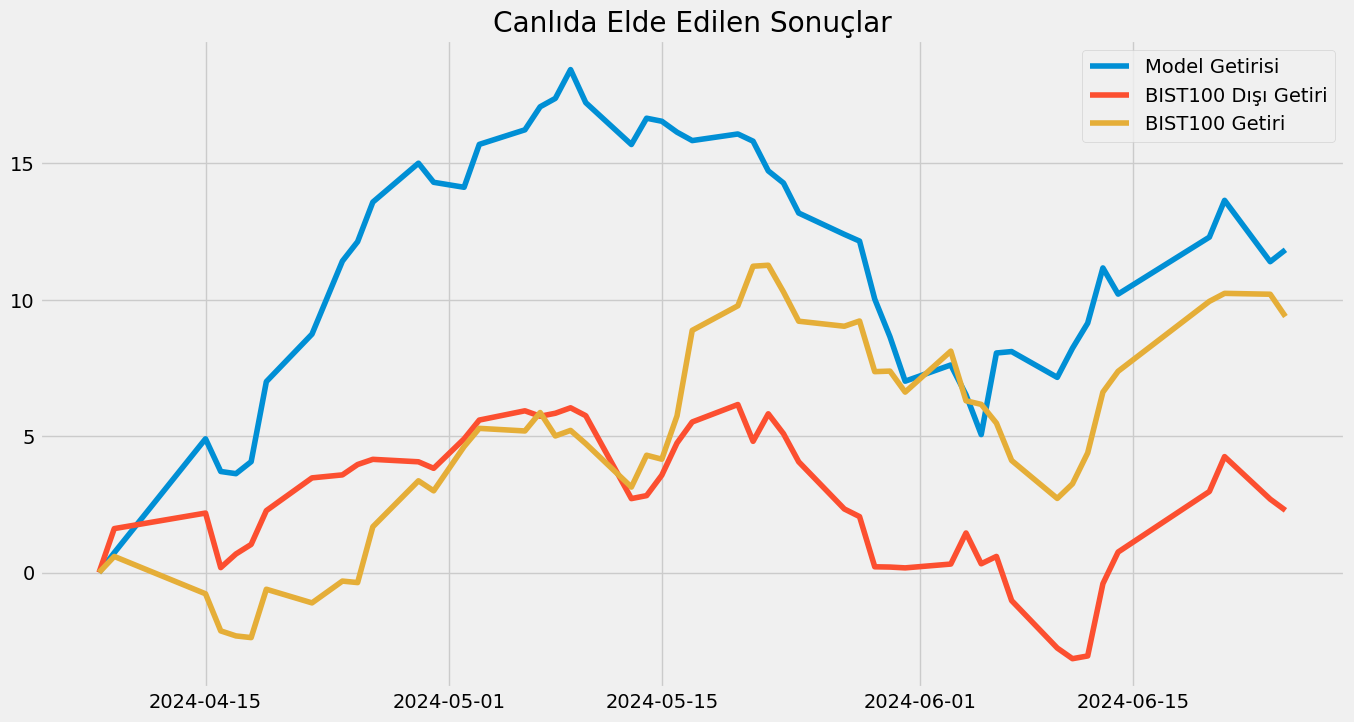

In [4]:
trade=pd.read_excel("./excel/trade.xlsx")
sonuclar=trade[["Kar(%).1","Endeks(%)"]].dropna()
sonuclar=sonuclar.set_index(yf.download(tickers="XU100.IS",start="2024-04-08").index)
endeks=yf.download(tickers="XU100.IS",start="2024-04-08")
endeks["Getiri"]=100*((endeks["Adj Close"]/endeks["Adj Close"].shift(1))-1)
endeks["Getiri"]=endeks["Getiri"].fillna(0)


import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Canlıda Elde Edilen Sonuçlar")
plt.plot(sonuclar["Kar(%).1"].cumsum(),label="Model Getirisi")
plt.plot(sonuclar["Endeks(%)"].cumsum(),label="BIST100 Dışı Getiri")
plt.plot(endeks["Getiri"].cumsum(),label="BIST100 Getiri")
plt.legend()